In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
netflix = pd.read_csv('/content/drive/MyDrive/TFM/Dataset_for_bert/netflix_ready_for_bert.csv')
movies = pd.read_csv('/content/drive/MyDrive/TFM/Dataset_for_bert/movies_ready_for_bert.csv')
music= pd.read_csv('/content/drive/MyDrive/TFM/Dataset_for_bert/music_ready_for_bert_with_standard_genres.csv')


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90267 entries, 0 to 90266
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   movieId     90267 non-null  int64  
 1   title       90267 non-null  object 
 2   genres      90267 non-null  object 
 3   userId      90267 non-null  int64  
 4   rating      90267 non-null  float64
 5   timestamp   90267 non-null  object 
 6   year        90267 non-null  int64  
 7   emotion     0 non-null      float64
 8   bert_input  90267 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 6.2+ MB


In [4]:
movies.head()

,movieId,title,genres,userId,rating,timestamp,year,emotion,bert_input
0,1,Toy Story,"Action, Children",1,4.0,2000-07-30 18:45:03,1995,NaN,"Toy Story | Action, Children | 1995 | Rating: 4.0"
1,1,Toy Story,"Action, Children",5,4.0,1996-11-08 06:36:02,1995,NaN,"Toy Story | Action, Children | 1995 | Rating: 4.0"
2,1,Toy Story,"Action, Children",7,4.5,2005-01-25 06:52:26,1995,NaN,"Toy Story | Action, Children | 1995 | Rating: 4.5"
3,1,Toy Story,"Action, Children",15,2.5,2017-11-13 12:59:30,1995,NaN,"Toy Story | Action, Children | 1995 | Rating: 2.5"
4,1,Toy Story,"Action, Children",17,4.5,2011-05-18 05:28:03,1995,NaN,"Toy Story | Action, Children | 1995 | Rating: 4.5"


**1. Distribución de Calificaciones**

Ver la distribución de calificaciones en el conjunto de datos.

Gráfico: Histograma.

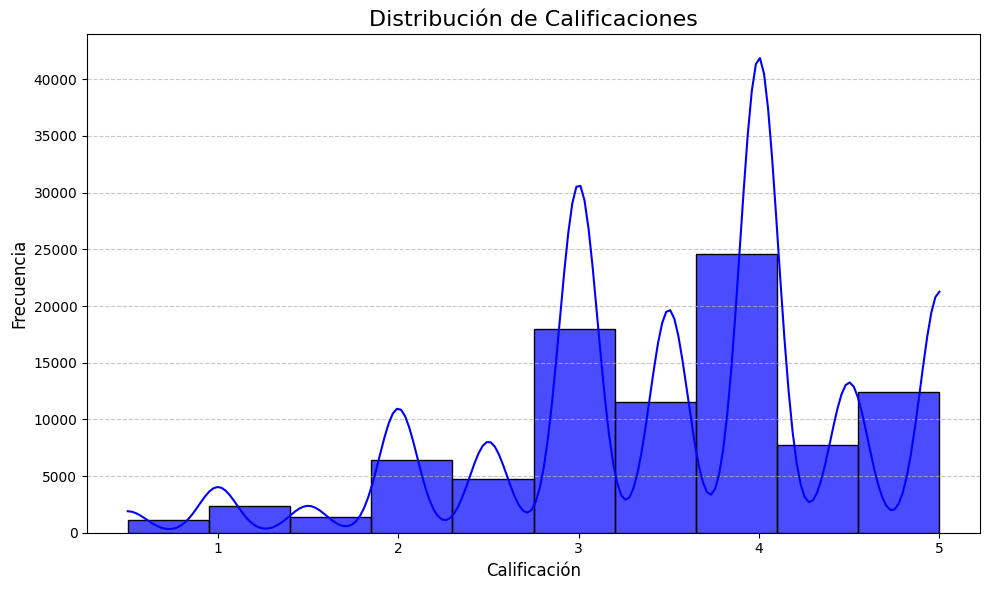

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de calificaciones
plt.figure(figsize=(10, 6))
sns.histplot(movies['rating'], bins=10, kde=True, color='blue', alpha=0.7)
plt.title('Distribución de Calificaciones', fontsize=16)
plt.xlabel('Calificación', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**2. Películas por Género**

Analizar los géneros más frecuentes.

Gráfico: Barra horizontal.

<ipython-input-10-8ee0ba8a323a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres.values, y=genres.index, palette='viridis', alpha=0.8)


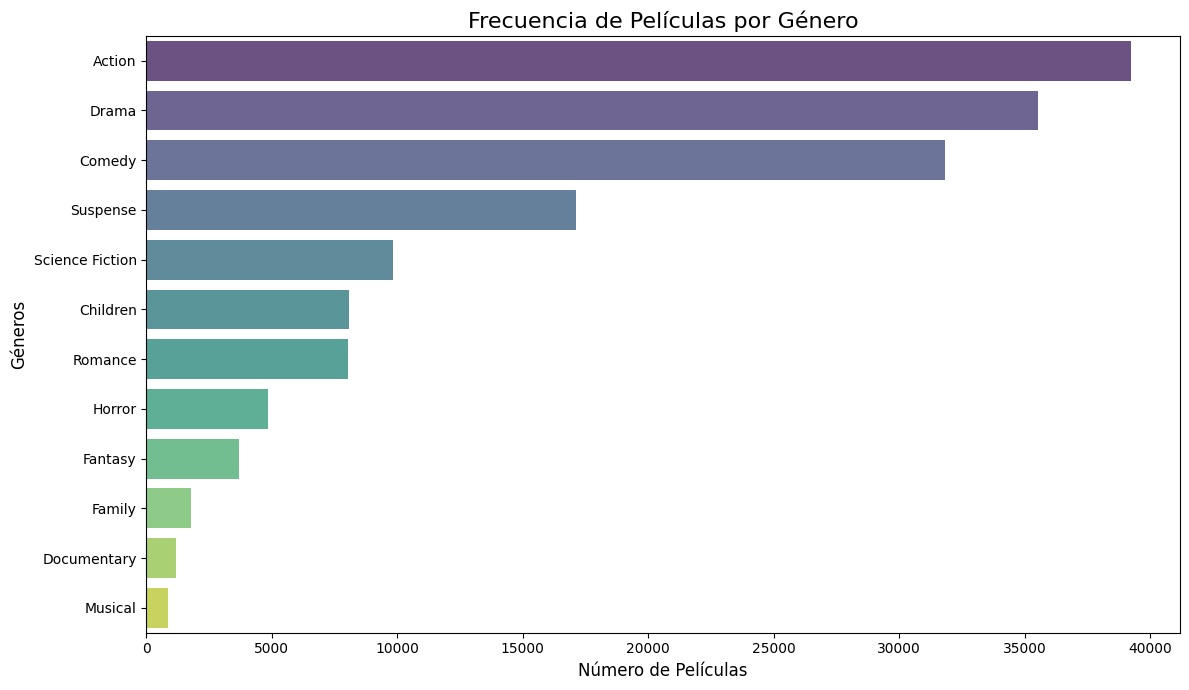

In [10]:
# Preparar los géneros
genres = movies['genres'].str.split(', ', expand=True).stack().value_counts()

# Gráfico de barras
plt.figure(figsize=(12, 7))
sns.barplot(x=genres.values, y=genres.index, palette='viridis', alpha=0.8)
plt.title('Frecuencia de Películas por Género', fontsize=16)
plt.xlabel('Número de Películas', fontsize=12)
plt.ylabel('Géneros', fontsize=12)
plt.tight_layout()
plt.show()


**3. Calificaciones por Género**

Calcular el promedio de calificaciones por género.

Gráfico: Violin plot.

<ipython-input-11-b75720793273>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='genre', y='rating', data=movies_exploded, palette='muted')


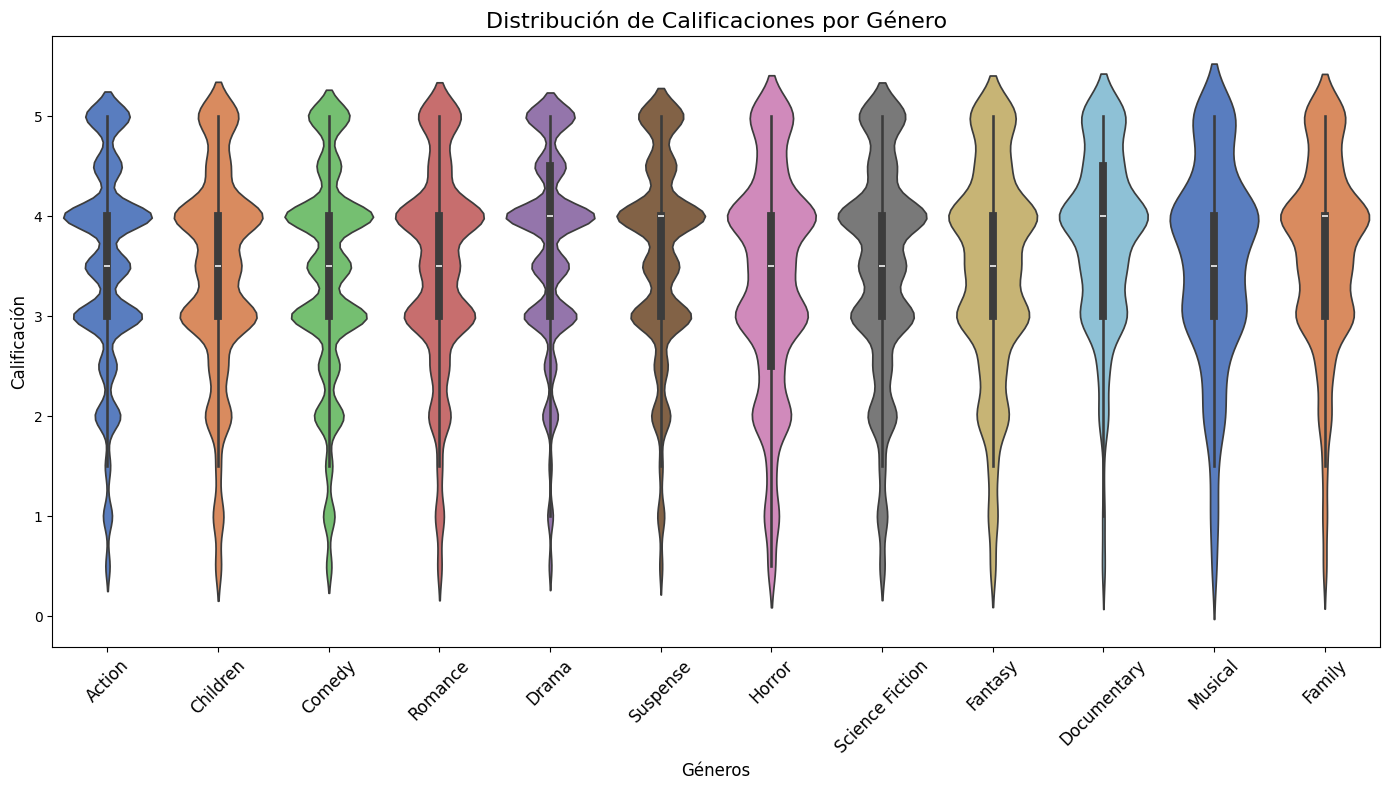

In [11]:
# Expandir géneros para análisis
movies_exploded = movies.assign(genre=movies['genres'].str.split(', ')).explode('genre')

# Violin plot
plt.figure(figsize=(14, 8))
sns.violinplot(x='genre', y='rating', data=movies_exploded, palette='muted')
plt.title('Distribución de Calificaciones por Género', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.xlabel('Géneros', fontsize=12)
plt.ylabel('Calificación', fontsize=12)
plt.tight_layout()
plt.show()


**4. Tendencia de Calificaciones por Año**

Analizar cómo evolucionaron las calificaciones con el tiempo.

Gráfico: Línea con sombreado.

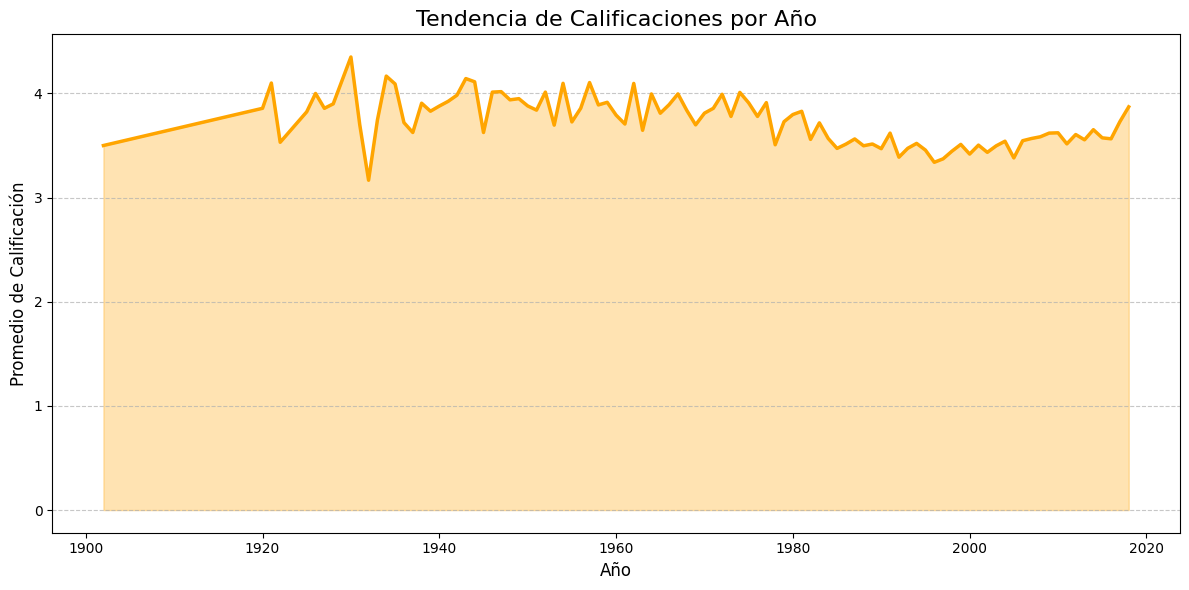

In [12]:
# Promedio de calificaciones por año
ratings_by_year = movies.groupby('year')['rating'].mean()

# Gráfico de línea
plt.figure(figsize=(12, 6))
sns.lineplot(x=ratings_by_year.index, y=ratings_by_year.values, color='orange', linewidth=2.5)
plt.fill_between(ratings_by_year.index, ratings_by_year.values, alpha=0.3, color='orange')
plt.title('Tendencia de Calificaciones por Año', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Promedio de Calificación', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [5]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7373 entries, 0 to 7372
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       7373 non-null   object 
 1   type          7373 non-null   object 
 2   title         7373 non-null   object 
 3   director      7373 non-null   object 
 4   cast          7373 non-null   object 
 5   country       7373 non-null   object 
 6   date_added    7373 non-null   object 
 7   release_year  7373 non-null   int64  
 8   rating        7373 non-null   float64
 9   duration      7373 non-null   object 
 10  description   7373 non-null   object 
 11  genres        7373 non-null   object 
 12  age_rating    7373 non-null   object 
 13  bert_input    7373 non-null   object 
 14  emotion       0 non-null      float64
dtypes: float64(2), int64(1), object(12)
memory usage: 864.1+ KB


In [6]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,genres,age_rating,bert_input,emotion
0,s1,TV Show,3%,Desconocido,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,3.0,4 Seasons,In a future where the elite inhabit an island ...,"International TV Shows, TV Dramas",TV-MA,3% | In a future where the elite inhabit an is...,NaN
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,0.5,93 min,After a devastating earthquake hits Mexico Cit...,"Dramas, International Movies",TV-MA,7:19 | After a devastating earthquake hits Mex...,NaN
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,3.5,78 min,"When an army recruit is found dead, his fellow...","Horror Movies, International Movies",R,"23:59 | When an army recruit is found dead, hi...",NaN
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,0.5,80 min,"In a postapocalyptic world, rag-doll robots hi...","Action & Adventure, Independent Movies",PG-13,"9 | In a postapocalyptic world, rag-doll robot...",NaN
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,0.5,123 min,A brilliant group of students become card-coun...,Dramas,PG-13,21 | A brilliant group of students become card...,NaN


In [7]:
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46191 entries, 0 to 46190
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Username         46191 non-null  object 
 1   Artist           46191 non-null  object 
 2   Track            46191 non-null  object 
 3   Album            46191 non-null  object 
 4   Date             46191 non-null  object 
 5   Time             46191 non-null  object 
 6   Genre            46191 non-null  object 
 7   bert_input       46191 non-null  object 
 8   emotion          0 non-null      float64
 9   rating           46191 non-null  float64
 10  standard_genres  46191 non-null  object 
dtypes: float64(2), object(9)
memory usage: 3.9+ MB


In [8]:
music.head()

,Username,Artist,Track,Album,Date,Time,Genre,bert_input,emotion,rating,standard_genres
0,Babs_05,Isobel Campbell,The Circus Is Leaving Town,Ballad of the Broken Seas,31 Jan 2021,0 days 23:36:00,Alternative/Indie,Isobel Campbell | The Circus Is Leaving Town |...,NaN,3.5,"['Drama', 'Nostalgic']"
1,Babs_05,Isobel Campbell,Dusty Wreath,Ballad of the Broken Seas,31 Jan 2021,0 days 23:32:00,Alternative/Indie,Isobel Campbell | Dusty Wreath | Ballad of the...,NaN,3.5,"['Drama', 'Nostalgic']"
2,Babs_05,Isobel Campbell,Honey Child What Can I Do?,Ballad of the Broken Seas,31 Jan 2021,0 days 23:28:00,Alternative/Indie,Isobel Campbell | Honey Child What Can I Do? |...,NaN,4.0,"['Drama', 'Nostalgic']"
3,Babs_05,Isobel Campbell,It's Hard To Kill A Bad Thing,Ballad of the Broken Seas,31 Jan 2021,0 days 23:25:00,Alternative/Indie,Isobel Campbell | It's Hard To Kill A Bad Thin...,NaN,4.5,"['Drama', 'Nostalgic']"
4,Babs_05,Isobel Campbell,Saturday's Gone,Ballad of the Broken Seas,31 Jan 2021,0 days 23:21:00,Alternative/Indie,Isobel Campbell | Saturday's Gone | Ballad of ...,NaN,4.5,"['Drama', 'Nostalgic']"



Frecuencia de Géneros (Estilo Uniforme)

<ipython-input-13-95b70165807a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_frequency.values, y=genre_frequency.index, palette="viridis", alpha=0.8)


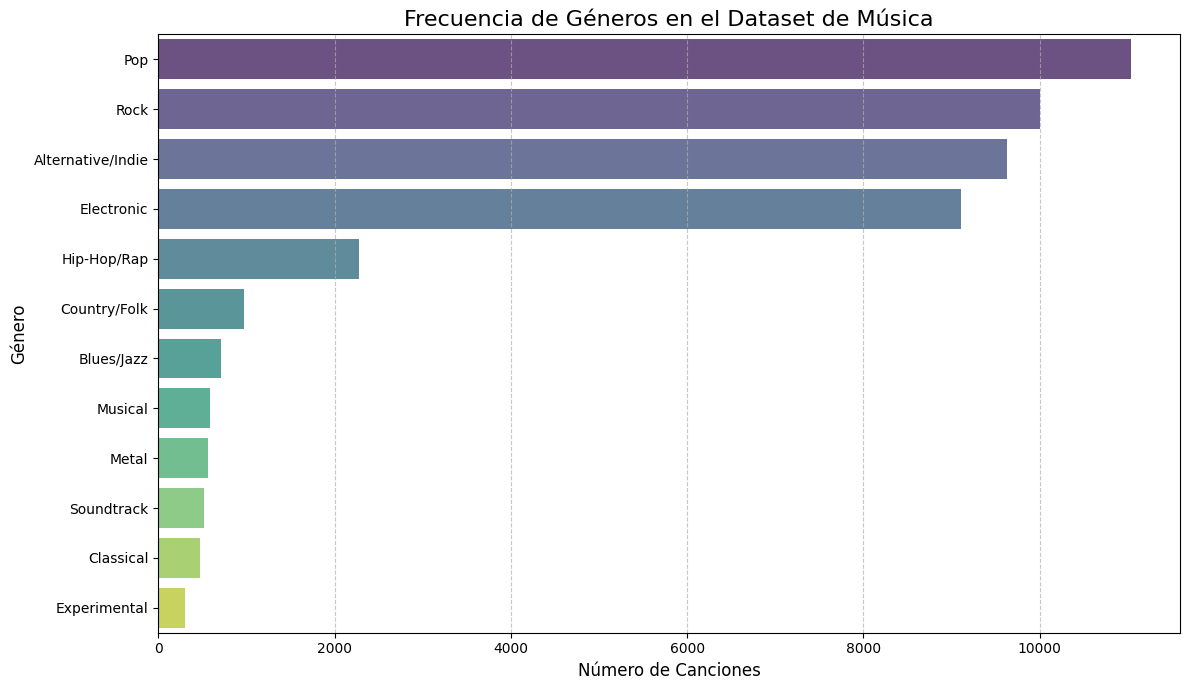

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Preparar los datos para la frecuencia de géneros
genre_frequency = music['Genre'].value_counts()

# Crear la gráfica con estilo uniforme
plt.figure(figsize=(12, 7))
sns.barplot(x=genre_frequency.values, y=genre_frequency.index, palette="viridis", alpha=0.8)
plt.title("Frecuencia de Géneros en el Dataset de Música", fontsize=16)
plt.xlabel("Número de Canciones", fontsize=12)
plt.ylabel("Género", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Distribución de Calificaciones (Estilo Uniforme)

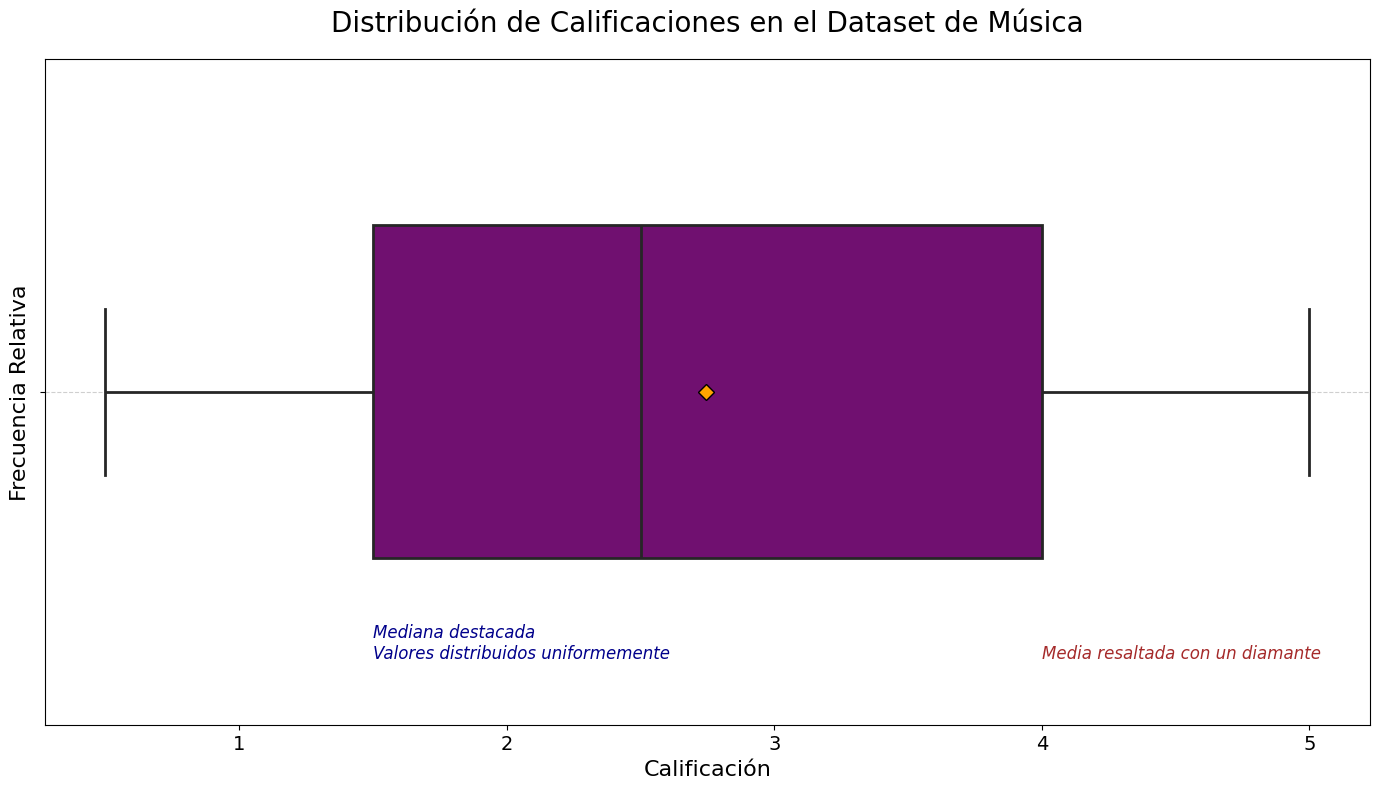

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un diagrama de caja avanzado para calificaciones
plt.figure(figsize=(14, 8))
sns.boxplot(
    x=music['rating'],
    color="purple",
    width=0.5,
    linewidth=2,
    flierprops={'marker': 'o', 'color': 'darkred', 'markersize': 10},  # Resalta outliers
    showmeans=True,
    meanprops={"marker": "D", "markerfacecolor": "orange", "markeredgecolor": "black", "markersize": 8}  # Marca la media
)

# Añadir etiquetas y personalización adicional
plt.title("Distribución de Calificaciones en el Dataset de Música", fontsize=20, pad=20)
plt.xlabel("Calificación", fontsize=16)
plt.ylabel("Frecuencia Relativa", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Anotaciones adicionales
plt.text(1.5, 0.4, "Mediana destacada\nValores distribuidos uniformemente", fontsize=12, color="darkblue", style='italic')
plt.text(4, 0.4, "Media resaltada con un diamante", fontsize=12, color="#a52a2a", style='italic')

# Ajustar y mostrar
plt.tight_layout()
plt.show()




In [25]:
# Cálculo de estadísticas básicas para la columna de calificaciones
median_rating = music['rating'].median()  # Mediana
mean_rating = music['rating'].mean()  # Media
quantiles = music['rating'].quantile([0, 0.25, 0.5, 0.75, 1])  # Percentiles

# Mostrar resultados
print("Mediana de Calificaciones:", median_rating)
print("Media de Calificaciones:", mean_rating)
print("Distribución de Calificaciones (Percentiles):")
print(quantiles)


Mediana de Calificaciones: 2.5
Media de Calificaciones: 2.7444415578792407
Distribución de Calificaciones (Percentiles):
0.00    0.5
0.25    1.5
0.50    2.5
0.75    4.0
1.00    5.0
Name: rating, dtype: float64


In [27]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7373 entries, 0 to 7372
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       7373 non-null   object 
 1   type          7373 non-null   object 
 2   title         7373 non-null   object 
 3   director      7373 non-null   object 
 4   cast          7373 non-null   object 
 5   country       7373 non-null   object 
 6   date_added    7373 non-null   object 
 7   release_year  7373 non-null   int64  
 8   rating        7373 non-null   float64
 9   duration      7373 non-null   object 
 10  description   7373 non-null   object 
 11  genres        7373 non-null   object 
 12  age_rating    7373 non-null   object 
 13  bert_input    7373 non-null   object 
 14  emotion       0 non-null      float64
dtypes: float64(2), int64(1), object(12)
memory usage: 864.1+ KB


In [28]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,genres,age_rating,bert_input,emotion
0,s1,TV Show,3%,Desconocido,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,3.0,4 Seasons,In a future where the elite inhabit an island ...,"International TV Shows, TV Dramas",TV-MA,3% | In a future where the elite inhabit an is...,NaN
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,0.5,93 min,After a devastating earthquake hits Mexico Cit...,"Dramas, International Movies",TV-MA,7:19 | After a devastating earthquake hits Mex...,NaN
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,3.5,78 min,"When an army recruit is found dead, his fellow...","Horror Movies, International Movies",R,"23:59 | When an army recruit is found dead, hi...",NaN
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,0.5,80 min,"In a postapocalyptic world, rag-doll robots hi...","Action & Adventure, Independent Movies",PG-13,"9 | In a postapocalyptic world, rag-doll robot...",NaN
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,0.5,123 min,A brilliant group of students become card-coun...,Dramas,PG-13,21 | A brilliant group of students become card...,NaN


Frecuencia de Géneros

<ipython-input-54-466550f8c4d1>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


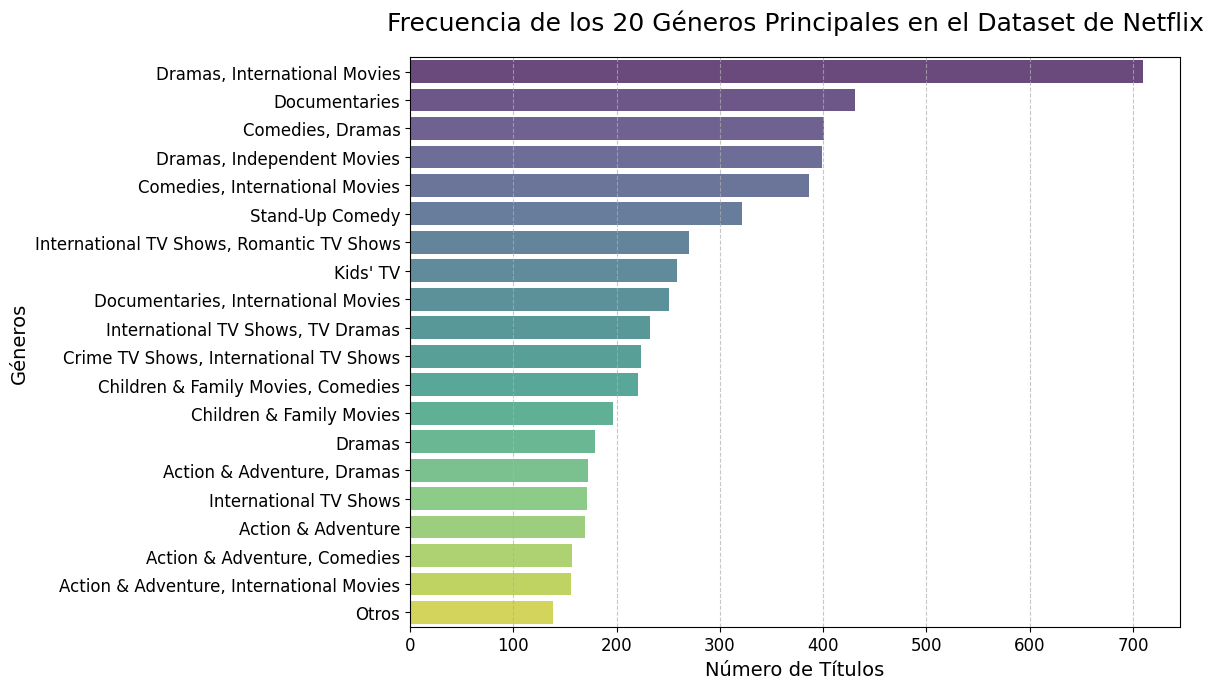

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Preparar los datos de frecuencia de géneros
genre_frequency = netflix['genres'].value_counts()

# Filtrar los 20 géneros principales
top_genres = genre_frequency.head(20)

# Crear la gráfica con formato uniforme
plt.figure(figsize=(12, 7))
sns.barplot(
    x=top_genres.values,
    y=top_genres.index,
    palette="viridis",
    alpha=0.8
)
plt.title("Frecuencia de los 20 Géneros Principales en el Dataset de Netflix", fontsize=18, pad=20)
plt.xlabel("Número de Títulos", fontsize=14)
plt.ylabel("Géneros", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Ajustar y mostrar
plt.tight_layout()
plt.show()



In [55]:
netflix.genres.value_counts()

,count
genres,
"Dramas, International Movies",710
Documentaries,431
"Comedies, Dramas",401
"Dramas, Independent Movies",399
"Comedies, International Movies",386
...,...
"Music & Musicals, Romantic Movies",1
Independent Movies,1
"Docuseries, Kids' TV",1


Distribución de Calificaciones (Boxplot)

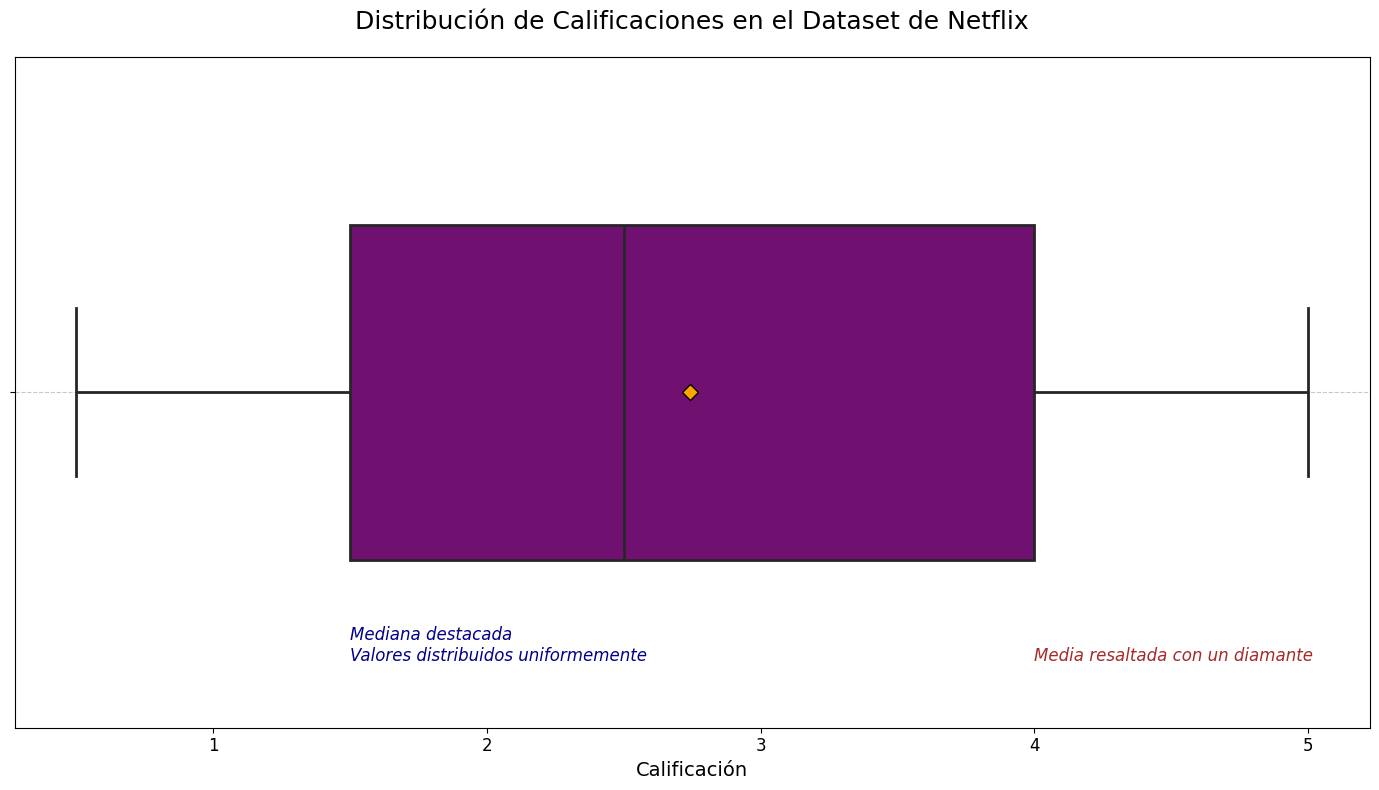

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un diagrama de caja avanzado para calificaciones
plt.figure(figsize=(14, 8))
sns.boxplot(
    x=netflix['rating'],
    color="purple",
    width=0.5,
    linewidth=2,
    flierprops={'marker': 'o', 'color': 'darkred', 'markersize': 10},  # Resalta outliers
    showmeans=True,
    meanprops={"marker": "D", "markerfacecolor": "orange", "markeredgecolor": "black", "markersize": 8}  # Marca la media
)

# Personalización de la gráfica
plt.title("Distribución de Calificaciones en el Dataset de Netflix", fontsize=18, pad=20)
plt.xlabel("Calificación", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Anotaciones adicionales
plt.text(1.5, 0.4, "Mediana destacada\nValores distribuidos uniformemente", fontsize=12, color="darkblue", style='italic')
plt.text(4, 0.4, "Media resaltada con un diamante", fontsize=12, color="#a52a2a", style='italic')

# Ajustar y mostrar
plt.tight_layout()
plt.show()



In [50]:
# Cálculo de estadísticas básicas para la columna de calificaciones
median_rating = netflix['rating'].median()  # Mediana
mean_rating = netflix['rating'].mean()  # Media
quantiles = netflix['rating'].quantile([0, 0.25, 0.5, 0.75, 1])  # Percentiles

# Mostrar resultados
print("Mediana de Calificaciones:", median_rating)
print("Media de Calificaciones:", mean_rating)
print("Distribución de Calificaciones (Percentiles):")
print(quantiles)


Mediana de Calificaciones: 2.5
Media de Calificaciones: 2.7407432524074324
Distribución de Calificaciones (Percentiles):
0.00    0.5
0.25    1.5
0.50    2.5
0.75    4.0
1.00    5.0
Name: rating, dtype: float64


In [51]:
netflix.rating.value_counts()

,count
rating,
3.5,770
2.0,768
0.5,746
1.0,743
3.0,740
4.0,736
4.5,733
2.5,725
1.5,707
